In [385]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose 
import datetime as datetime
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np
from sklearn.metrics import mean_squared_error
from pmdarima import auto_arima
from prophet import Prophet
from sklearn.ensemble import RandomForestRegressor

In [386]:
import yfinance as yf
from datetime import timedelta

In [387]:
End_time = datetime.date.today()

In [388]:
Start_time = End_time- timedelta(days=365*5)

In [389]:
data = yf.download("^NSEI",start=Start_time,end=End_time)

[*********************100%***********************]  1 of 1 completed


In [390]:
data.head()

Price,Close,High,Low,Open,Volume
Ticker,^NSEI,^NSEI,^NSEI,^NSEI,^NSEI
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [391]:
data.columns

MultiIndex([( 'Close', '^NSEI'),
            (  'High', '^NSEI'),
            (   'Low', '^NSEI'),
            (  'Open', '^NSEI'),
            ('Volume', '^NSEI')],
           names=['Price', 'Ticker'])

In [392]:
data.index

DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [393]:
#Data has Multi indexed columns i.e. columns is stored as tuple
if isinstance(data.columns,pd.MultiIndex):
    data.columns= [col[0] for col in data.columns]

In [394]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [395]:
type(data.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [396]:
#check if there is any null in the data
sum(data['Close'].isnull())
data.isnull().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

In [397]:
#check if there is any not a number value
data.isna().sum()

Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Text(0.5, 1.0, 'NIFTY50 last 5 years closing price')

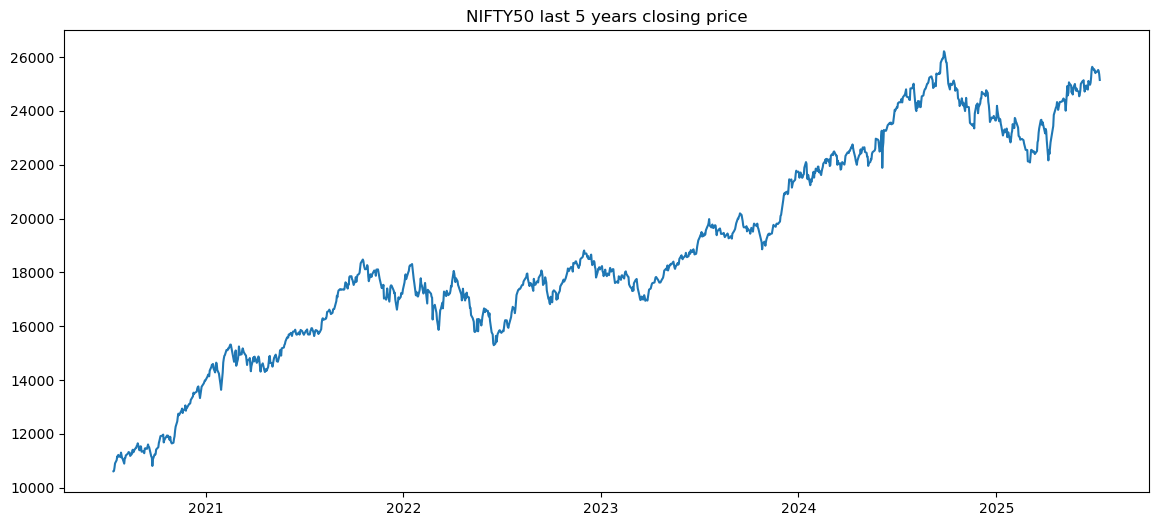

In [398]:
plt.figure(figsize=(14,6))
plt.plot(data.index,data['Close'], label='NIFTY 50')
plt.title("NIFTY50 last 5 years closing price")

In [399]:
#Decompose the time series to see trends, sesonality and residue 
add_decompose_results = seasonal_decompose(data['Close'], model="aditive",period=252)

In [400]:
#Decompose the time series to see trends, sesonality and residue 
mumltiple_decompose_results = seasonal_decompose(data['Close'], model="multiplicative",period=252)

<Figure size 1200x800 with 0 Axes>

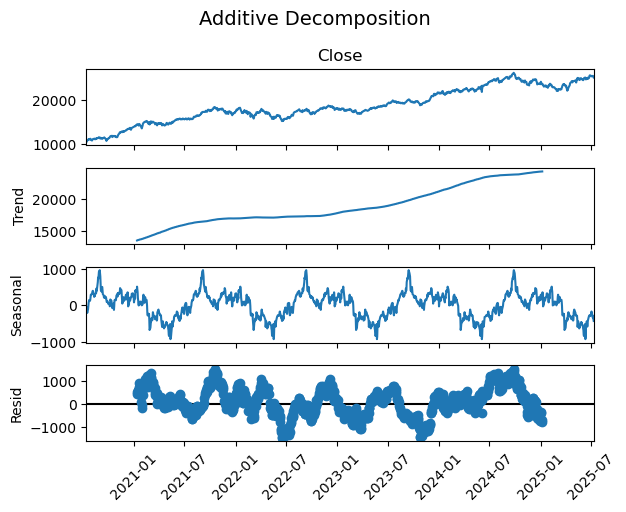

In [401]:
#plot Additive
plt.figure(figsize=(12,8))
add_decompose_results.plot()
plt.suptitle("Additive Decomposition", fontsize =14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

<Figure size 1200x800 with 0 Axes>

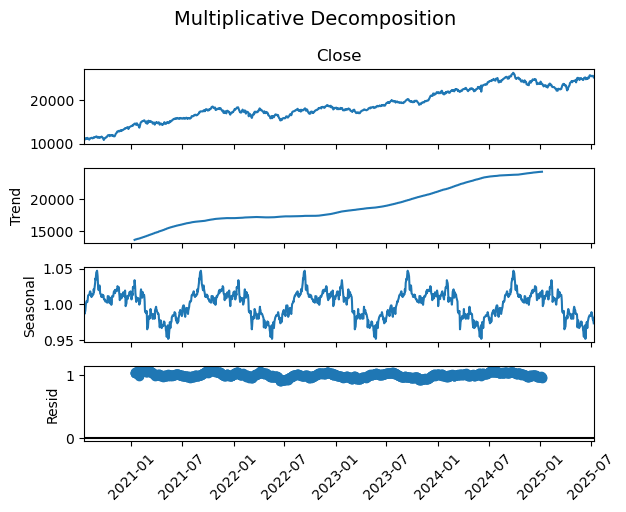

In [402]:
#plot multiplicative
#For multiplicative Resudue is not in proper range so better to select additive 
plt.figure(figsize=(12,8))
mumltiple_decompose_results.plot()
plt.suptitle("Multiplicative Decomposition", fontsize =14)
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

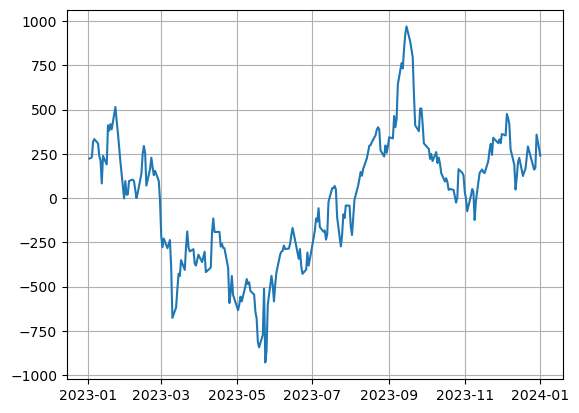

In [403]:
seasonal_zoom = add_decompose_results.seasonal['2023-01-01':'2024-01-01']
plt.plot(seasonal_zoom)
plt.grid()

In [404]:
type(add_decompose_results)
High_price_dates= data[data['Close']>950].index
Low_price_dates= data[data['Close']<-950].index


In [405]:
print(High_price_dates)

DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)


In [406]:
Seasonal_High = add_decompose_results.seasonal.loc[High_price_dates]
Seasonal_Low = add_decompose_results.seasonal.loc[Low_price_dates]

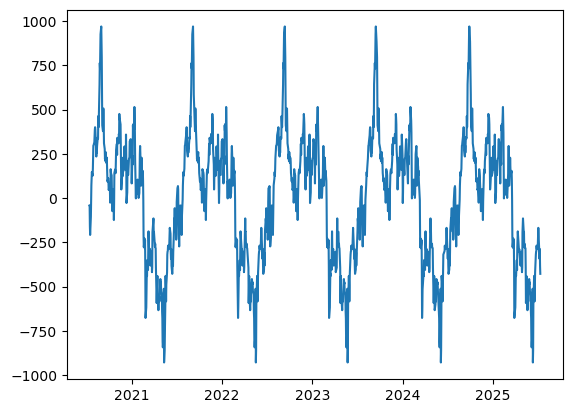

In [407]:
plt.plot(Seasonal_High)

In [408]:
# no much help. we want month wise seasonality insight
seasonal =add_decompose_results.seasonal
seasonal.index


DatetimeIndex(['2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-20', '2020-07-21', '2020-07-22', '2020-07-23',
               '2020-07-24', '2020-07-27',
               ...
               '2025-06-30', '2025-07-01', '2025-07-02', '2025-07-03',
               '2025-07-04', '2025-07-07', '2025-07-08', '2025-07-09',
               '2025-07-10', '2025-07-11'],
              dtype='datetime64[ns]', name='Date', length=1237, freq=None)

In [409]:
#Convert seasonal to pandas dataframe
seasonal_df = seasonal.to_frame(name='seasonal')
seasonal_df.head()

,seasonal
Date,
2020-07-14,-41.504131
2020-07-15,-42.485626
2020-07-16,-160.146639
2020-07-17,-207.965215
2020-07-20,-105.906812


In [410]:
seasonal_df['month']= seasonal_df.index.month
seasonal_df['year']= seasonal_df.index.year

In [411]:
seasonal_df.head()

,seasonal,month,year
Date,,,
2020-07-14,-41.504131,7,2020
2020-07-15,-42.485626,7,2020
2020-07-16,-160.146639,7,2020
2020-07-17,-207.965215,7,2020
2020-07-20,-105.906812,7,2020


In [412]:
monthly_seasonality = seasonal_df.groupby('month').mean()
yearly_seasonality = seasonal_df.groupby('year')['seasonal'].mean()

In [413]:
monthly_seasonality

,seasonal,year
month,,
1,231.734888,2023.066667
2,109.600316,2022.990000
3,-266.578697,2022.930000
4,-367.485860,2023.010638
5,-548.755136,2023.019048
6,-354.768706,2022.952381
7,-102.548276,2022.398148
8,266.437968,2022.009524
9,483.709325,2021.971698


In [414]:
yearly_seasonality

year
2020    246.694821
2021     -4.405051
2022     -4.036445
2023     -3.626431
2024     -5.690888
2025   -164.355190
Name: seasonal, dtype: float64

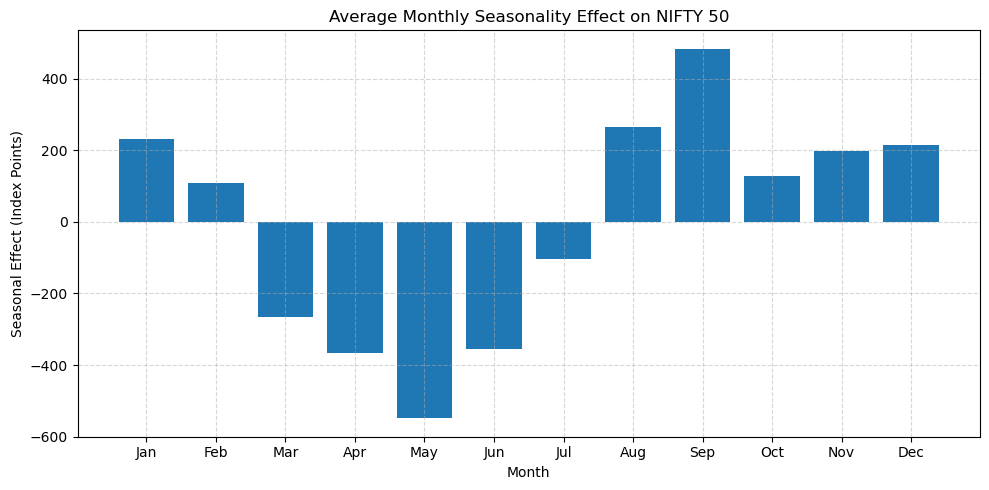

In [415]:
# I will plot monthly seasonability
#seasonability and return to be considered for Neural network models
plt.figure(figsize=(10,5))
plt.bar(monthly_seasonality.index,monthly_seasonality['seasonal'])
plt.xticks(ticks=range(1,13),labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Average Monthly Seasonality Effect on NIFTY 50")
plt.xlabel("Month")
plt.ylabel("Seasonal Effect (Index Points)")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

ARIMA Forecasting

In [416]:
nifty_arima = data['Close']

In [417]:
from statsmodels.tsa.stattools import adfuller

In [418]:
def adf_test(test_data):
    adf_result = adfuller(test_data)
    print("ADF_Statistic:",adf_result[0])
    print("p-value:",adf_result[1])
    if adf_result[1] > 0.05:
        print("Series is likely non-stationary. Differencing needed")
    else:
        print("Series is likely stationary")
 


In [419]:
adf_test(nifty_arima.diff().dropna())
# len(nifty_arima_diff)

ADF_Statistic: -35.60009767886595
p-value: 0.0
Series is likely stationary


module is stationary with d=1


In [420]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


To decide for lags in plots:
lags = min(40, len(series)/5)

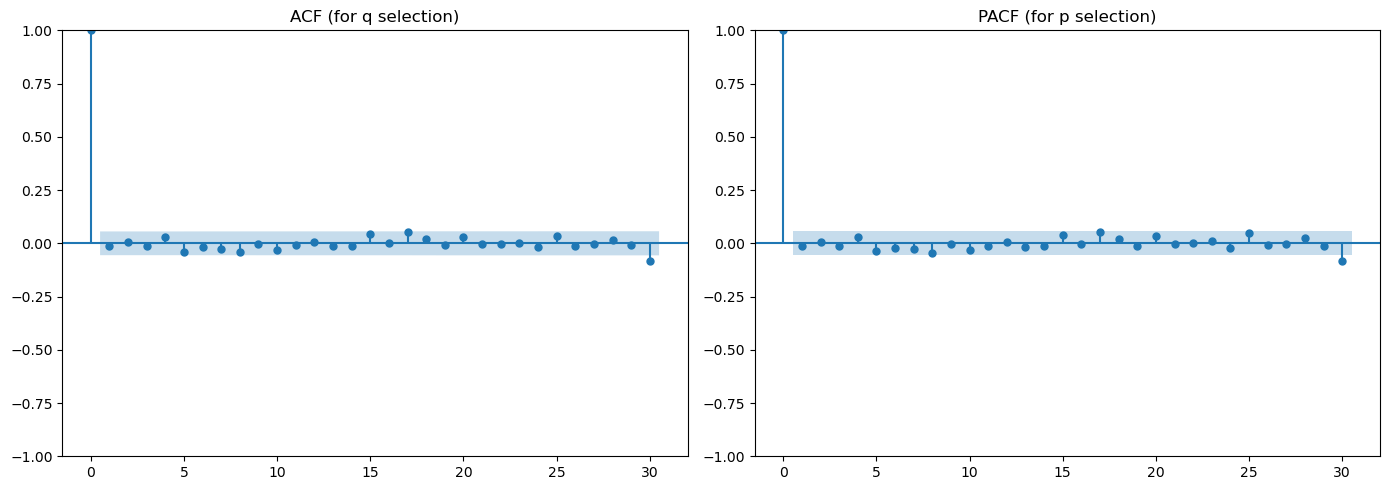

In [421]:
nifty_arima_diff = nifty_arima.diff().dropna()
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plot_acf(nifty_arima_diff,lags=30, ax=plt.gca())
plt.title('ACF (for q selection)')
plt.subplot(1,2,2)
plot_pacf(nifty_arima_diff,lags=30,ax =plt.gca())
plt.title('PACF (for p selection)')
plt.tight_layout()
plt.show()


Inconclusive ACF PACF plot. Better to go for AIC RMSE score

In [422]:
# Do train test split first
Nifty_train = nifty_arima[:-30]
Nifty_test = nifty_arima[-30:]

In [423]:
print(len(Nifty_train))
print(len(Nifty_test))

1207
30


In [424]:
model = ARIMA(Nifty_train, order=(0,1,0))
model_fit = model.fit()
forecast = model_fit.forecast(steps=30)
rmse = np.sqrt(mean_squared_error(Nifty_test,forecast))
aic = model_fit.aic

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

In [425]:
best_result = None
results=[]
Best_p = None
Best_q =None

In [426]:
aic

15825.801344558413

In [427]:
rmse

494.2139457017101

In [428]:
#Try combination of p and q from 0 to 5 with keeping d as 1
for p in range(6):
    for q in range(6):
        try:
            model = ARIMA(Nifty_train, order=(p,1,q))
            model_fit = model.fit()
            forecast = model_fit.forecast(steps=30)
            rmse = np.sqrt(mean_squared_error(Nifty_test,forecast))
            aic = model_fit.aic
            results.append(((p,1,q),aic,rmse))
            if not np.isnan(rmse) and (best_result is None or rmse< best_result[2]):
                best_result= (((p,1,q),aic,rmse))
                Best_p =p
                Best_q = q
                print(f"New best model found: (p={p}, d=1, q={q}) with RMSE={rmse:.2f}")
        except Exception as e:
            print(f"Failed for order =({p},1,{q}):{e}")
            continue
            

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users

New best model found: (p=0, d=1, q=0) with RMSE=494.21
New best model found: (p=0, d=1, q=1) with RMSE=493.46


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=0, d=1, q=2) with RMSE=493.45
New best model found: (p=0, d=1, q=3) with RMSE=493.31


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=1, d=1, q=1) with RMSE=492.83


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, f

New best model found: (p=2, d=1, q=2) with RMSE=488.52


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=2, d=1, q=5) with RMSE=478.73


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=3, d=1, q=3) with RMSE=459.36


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anacond

New best model found: (p=3, d=1, q=4) with RMSE=446.39


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates,

New best model found: (p=4, d=1, q=3) with RMSE=386.69


c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anacond

In [429]:
print("Best ARIMA(p,d,q):", best_result[0])
print("AIC", best_result[1])
print("RMSE", best_result[2])
print("Best p value is:", Best_p)
print("Best q value is:", Best_q)

Best ARIMA(p,d,q): (4, 1, 3)
AIC 15830.770903440749
RMSE 386.69066124431953
Best p value is: 4
Best q value is: 3


We will plot the forecat and actual values

In [430]:
model = ARIMA(Nifty_train, order=(4,1,3))
model_fit =model.fit()

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [431]:
forecast = model_fit.forecast(steps=30)

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<function matplotlib.pyplot.show(close=None, block=None)>

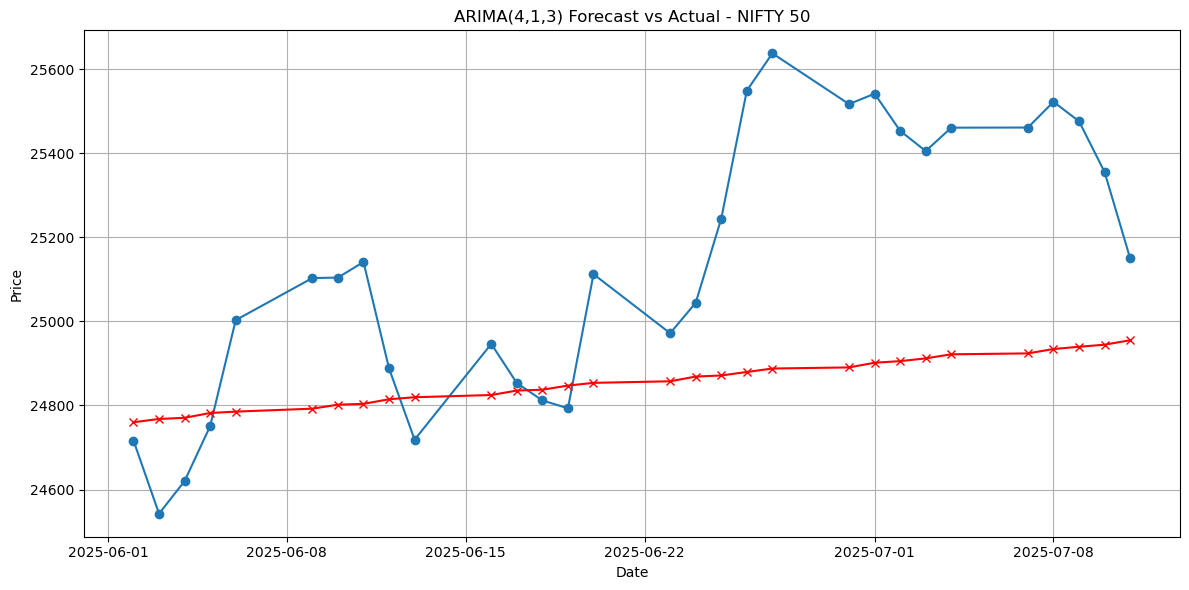

In [432]:
plt.figure(figsize=(12,6))
plt.plot(Nifty_test.index,Nifty_test, label = 'Actual', marker ='o')
plt.plot(Nifty_test.index,forecast,label = 'Forecast', marker ='x',color='red')
plt.title('ARIMA(4,1,3) Forecast vs Actual - NIFTY 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.tight_layout()
plt.show

ARIMA doesn't perform well it does well with stationary and smooth time series

Try NIFTY returns with SARIMA

In [433]:
data.head()

,Close,High,Low,Open,Volume
Date,,,,,
2020-07-14,10607.349609,10755.650391,10562.900391,10750.849609,532400
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300


In [434]:
data['returns'] = data['Close'].pct_change()

In [435]:
data.dropna(inplace=True)

In [436]:
Returns_train = data['returns'][:-30]
Returns_test = data['returns'][-30:]

In [437]:
data.head()

,Close,High,Low,Open,Volume,returns
Date,,,,,,
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900,0.001023
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400,0.011466
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900,0.015061
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300,0.011053
2020-07-21,11162.250000,11179.549805,11113.250000,11126.099609,772000,0.012706


Auto ARIMA to find best SARIMAX model with returns
X- stands for sxogeneous inputs such as other external factors

In [438]:
# auto_model = auto_arima(Returns_train,
#                         seasonal= True, m=5,
#                         d=1,D=1,
#                         start_p=0, start_q=0, max_p=4, max_q=4,
#                         trace=True, stepwise=True,
#                         suppress_warnings=True)

In [439]:
auto_model = auto_arima(Returns_train,
                        seasonal= True, m=12,
                        d=1,D=1,
                        start_p=0, start_q=0, max_p=4, max_q=4,
                        trace=True, stepwise=True,
                        suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=3.20 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-6150.404, Time=0.52 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-6819.913, Time=1.63 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.80 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=-6493.181, Time=0.22 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=-6927.615, Time=1.10 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=8.95 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.03 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=-6610.152, Time=1.23 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=-7057.522, Time=12.33 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=-6930.921, Time=1.58 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=12.38 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.61 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=-7152.951, Time=14.24 sec
 ARIMA(3,1,0)(1,1,0)[12]             :

In [440]:
print(auto_model.summary())


                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                 1206
Model:             SARIMAX(2, 1, 2)x(2, 1, [], 12)   Log Likelihood                3698.151
Date:                             Sun, 13 Jul 2025   AIC                          -7382.301
Time:                                     19:38:59   BIC                          -7346.712
Sample:                                          0   HQIC                         -7368.891
                                            - 1206                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8848      0.025    -35.616      0.000      -0.933      -0.836
ar.L2          0.0170      

In [441]:
n_steps =30
order =auto_model.order
seasonal_order = auto_model.seasonal_order

In [442]:
model = SARIMAX(Returns_train,order=order,
                seasonal_order=seasonal_order,
                enforce_stationarity =False,
                enforce_invertibility =False
                )
fit = model.fit()

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Forecast returns and convert back returns to prices

In [443]:
forcast_returns= fit.forecast(steps=30)
forcast_returns.shape

c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Ajay\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


(30,)

convert Return back to prices in a following way
Get the value befre forecast starts let us say it as 
last_price 
Now multiply it with (1+forecast_retun).cumprod()
in cumprod each next value of series is mulitplied with past value

In [444]:
last_price = data['Close'].iloc[-31]
forecast_prices = last_price * (1 + forcast_returns).cumprod()
print(last_price)
forecast_prices.shape

24750.69921875


(30,)

In [445]:
actual_prices = data['Close'].iloc[-30:]
actual_prices.shape

(30,)

Evaluation

In [446]:
actual_prices = data['Close'].iloc[-30:]
rmse =np.sqrt(mean_squared_error(actual_prices,forecast_prices))
print("Best SARIMA order:", order)
print("Best seasonal order:", seasonal_order)
print("RMSE:", rmse)
print("AIC:",fit.aic)

Best SARIMA order: (2, 1, 2)
Best seasonal order: (2, 1, 0, 12)
RMSE: 504.7981168407806
AIC: -7250.494681105486


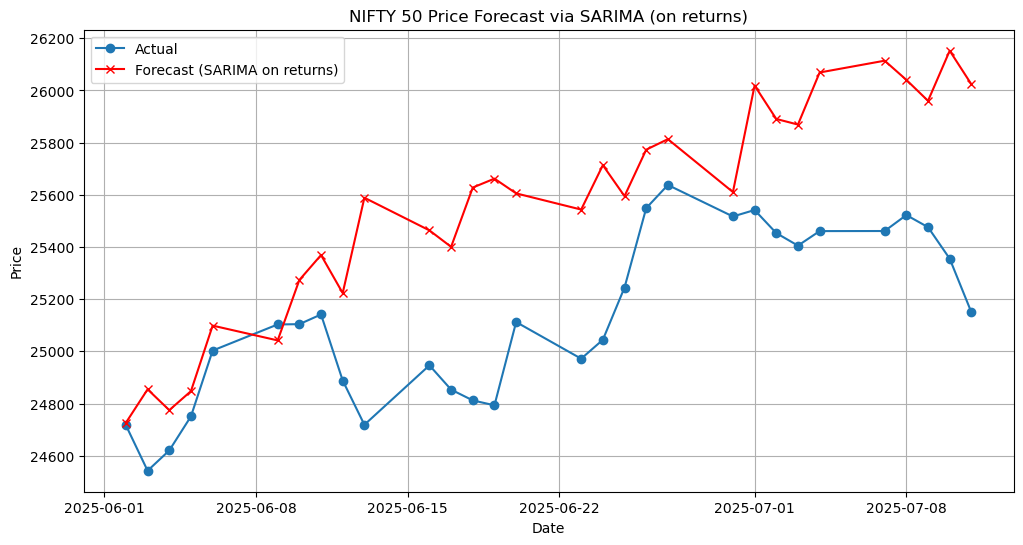

In [447]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices.index, actual_prices, label="Actual",marker = 'o')
plt.plot(actual_prices.index, forecast_prices, label="Forecast (SARIMA on returns)", color='red',marker = 'x')
plt.title("NIFTY 50 Price Forecast via SARIMA (on returns)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Analysis with profet

In [448]:
data_prophet = data.copy()

In [449]:
data_prophet.head()

,Close,High,Low,Open,Volume,returns
Date,,,,,,
2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900,0.001023
2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400,0.011466
2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900,0.015061
2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300,0.011053
2020-07-21,11162.250000,11179.549805,11113.250000,11126.099609,772000,0.012706


In [450]:
data_prophet.reset_index(inplace=True)

In [451]:
data_prophet.index

RangeIndex(start=0, stop=1236, step=1)

In [452]:
data_prophet.head()

,Date,Close,High,Low,Open,Volume,returns
0,2020-07-15,10618.200195,10827.450195,10577.750000,10701.000000,715900,0.001023
1,2020-07-16,10739.950195,10755.299805,10595.200195,10706.200195,694400,0.011466
2,2020-07-17,10901.700195,10933.450195,10749.650391,10752.000000,676900,0.015061
3,2020-07-20,11022.200195,11037.900391,10953.000000,10999.450195,554300,0.011053
4,2020-07-21,11162.250000,11179.549805,11113.250000,11126.099609,772000,0.012706


In [453]:
data_prophet = data_prophet[['Date','Close']]

In [454]:
data_prophet.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

In [455]:
data_prophet.head()

,ds,y
0,2020-07-15,10618.200195
1,2020-07-16,10739.950195
2,2020-07-17,10901.700195
3,2020-07-20,11022.200195
4,2020-07-21,11162.250000


In [456]:
prophet_train = data_prophet[:-30]
prophet_test = data_prophet[-30:]

In [457]:
model = Prophet()
# model.add_country_holidays(country_name='IN')  # Optional: Indian holidays
model.fit(prophet_train)

19:39:22 - cmdstanpy - INFO - Chain [1] start processing
19:39:25 - cmdstanpy - INFO - Chain [1] done processing


In [458]:
future = model.make_future_dataframe(periods=252,freq='B')
prophet_forecast = model.predict(future)
prophet_forecast.shape
prophet_forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-07-15,9953.736377,10125.130378,11127.388874,9953.736377,9953.736377,663.857770,663.857770,663.857770,-91.962160,-91.962160,-91.962160,755.819931,755.819931,755.819931,0.0,0.0,0.0,10617.594147
1,2020-07-16,9962.735566,10189.228425,11135.650238,9962.735566,9962.735566,674.900543,674.900543,674.900543,-107.068187,-107.068187,-107.068187,781.968730,781.968730,781.968730,0.0,0.0,0.0,10637.636110
2,2020-07-17,9971.734756,10117.960438,11150.406397,9971.734756,9971.734756,688.905012,688.905012,688.905012,-116.805686,-116.805686,-116.805686,805.710698,805.710698,805.710698,0.0,0.0,0.0,10660.639768
3,2020-07-20,9998.732325,10204.517343,11237.398669,9998.732325,9998.732325,740.698280,740.698280,740.698280,-122.199117,-122.199117,-122.199117,862.897397,862.897397,862.897397,0.0,0.0,0.0,10739.430604
4,2020-07-21,10007.731515,10260.592520,11269.147108,10007.731515,10007.731515,767.811348,767.811348,767.811348,-109.785130,-109.785130,-109.785130,877.596478,877.596478,877.596478,0.0,0.0,0.0,10775.542862


c:\Users\Ajay\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Ajay\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


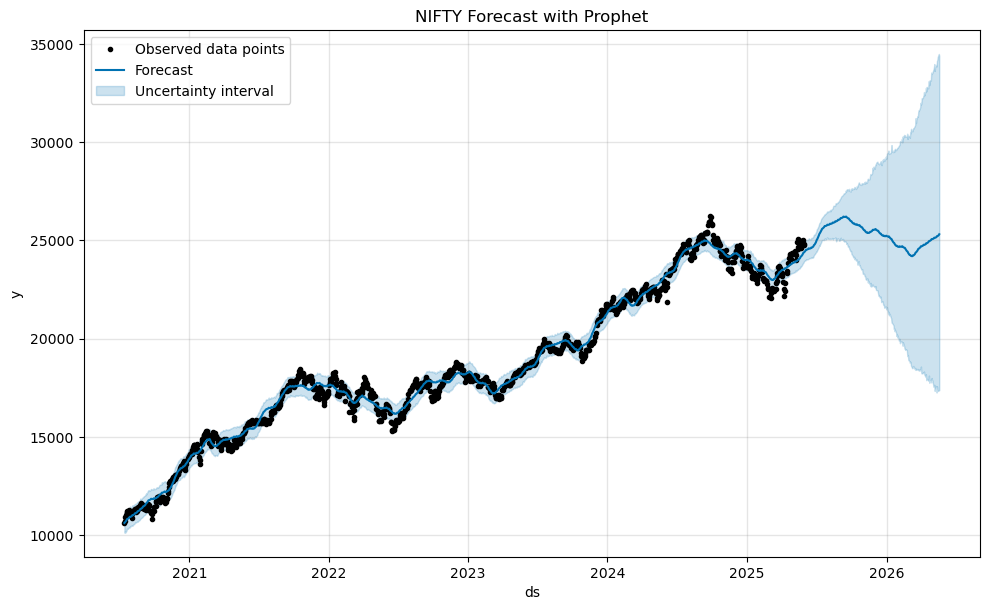

In [459]:
fig1 = model.plot(prophet_forecast)
plt.title("NIFTY Forecast with Prophet")
plt.legend()
plt.show()

c:\Users\Ajay\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Ajay\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
c:\Users\Ajay\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

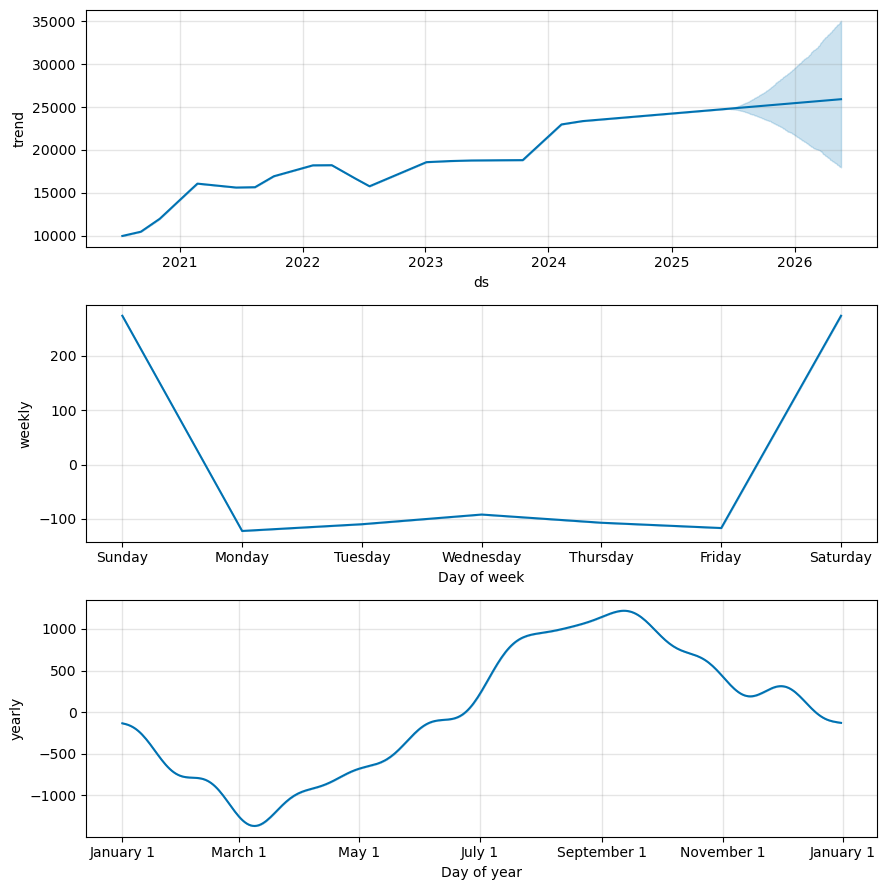

In [460]:
fig2 = model.plot_components(prophet_forecast)
plt.show()

In [461]:
rmse = np.sqrt(mean_squared_error(prophet_test['y'].values, prophet_forecast['yhat'][-30:].values))
print(f"RMSE on last 30 days: {rmse:.2f}")

RMSE on last 30 days: 245.45


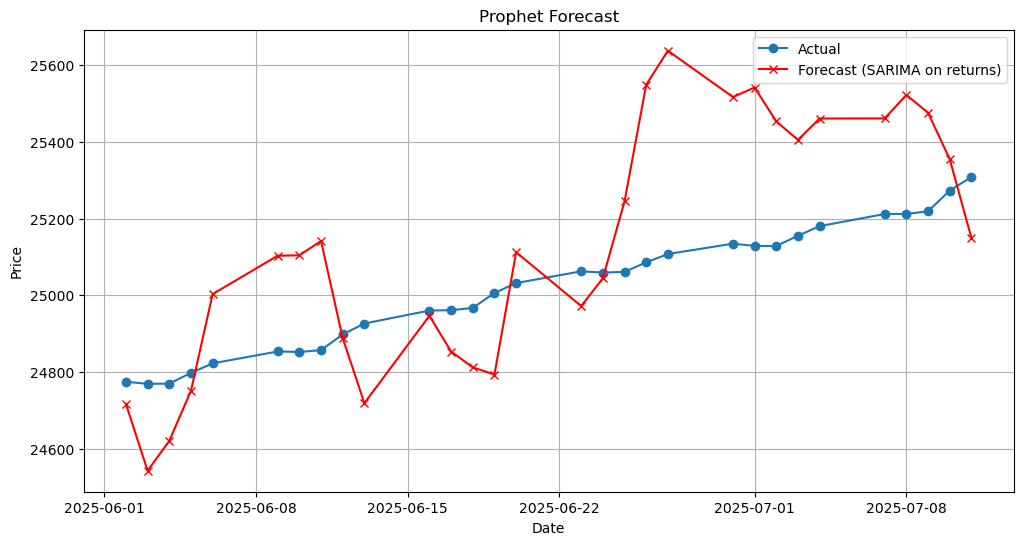

In [462]:
plt.figure(figsize=(12,6))
plt.plot(actual_prices.index, prophet_forecast['yhat'][-30:].values, label="Actual",marker = 'o')
plt.plot(actual_prices.index, prophet_test['y'].values, label="Forecast (SARIMA on returns)", color='red',marker = 'x')
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

Now we will try Random Forest module

In [463]:
nifty_rf = data[['Close']].dropna()

In [464]:
nifty_rf.head()

,Close
Date,
2020-07-15,10618.200195
2020-07-16,10739.950195
2020-07-17,10901.700195
2020-07-20,11022.200195
2020-07-21,11162.250000


In [465]:
nifty_rf.rename(columns={'Close':'y'},inplace=True)

In [466]:
nifty_rf

,y
Date,
2020-07-15,10618.200195
2020-07-16,10739.950195
2020-07-17,10901.700195
2020-07-20,11022.200195
2020-07-21,11162.250000
...,...
2025-07-07,25461.300781
2025-07-08,25522.500000
2025-07-09,25476.099609


In [467]:
nifty_rf['lag_1'] = nifty_rf['y'].shift(1)
nifty_rf['lag_2'] = nifty_rf['y'].shift(2)
nifty_rf['lag_3'] = nifty_rf['y'].shift(3)
nifty_rf['lag_4'] = nifty_rf['y'].shift(4)
nifty_rf['lag_5'] = nifty_rf['y'].shift(5)
nifty_rf

,y,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2020-07-15,10618.200195,NaN,NaN,NaN,NaN,NaN
2020-07-16,10739.950195,10618.200195,NaN,NaN,NaN,NaN
2020-07-17,10901.700195,10739.950195,10618.200195,NaN,NaN,NaN
2020-07-20,11022.200195,10901.700195,10739.950195,10618.200195,NaN,NaN
2020-07-21,11162.250000,11022.200195,10901.700195,10739.950195,10618.200195,NaN
...,...,...,...,...,...,...
2025-07-07,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781,25517.050781
2025-07-08,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781
2025-07-09,25476.099609,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391


In [468]:
nifty_rf.dropna(inplace=True)

In [469]:
nifty_rf

,y,lag_1,lag_2,lag_3,lag_4,lag_5
Date,,,,,,
2020-07-22,11132.599609,11162.250000,11022.200195,10901.700195,10739.950195,10618.200195
2020-07-23,11215.450195,11132.599609,11162.250000,11022.200195,10901.700195,10739.950195
2020-07-24,11194.150391,11215.450195,11132.599609,11162.250000,11022.200195,10901.700195
2020-07-27,11131.799805,11194.150391,11215.450195,11132.599609,11162.250000,11022.200195
2020-07-28,11300.549805,11131.799805,11194.150391,11215.450195,11132.599609,11162.250000
...,...,...,...,...,...,...
2025-07-07,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781,25517.050781
2025-07-08,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781
2025-07-09,25476.099609,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391


In [470]:
rf_train = nifty_rf[:-30]
rf_test = nifty_rf[-30:]

In [471]:
#Lag 4 and 5 does not help much
# x_train = rf_train[['lag_1','lag_2','lag_3','lag_4','lag_5']]
# y_train = rf_train['y']
# x_test = rf_test[['lag_1','lag_2','lag_3','lag_4','lag_5']]
# y_test = rf_test['y']


In [472]:
x_train = rf_train[['lag_1','lag_2','lag_3']]
y_train = rf_train['y']
x_test = rf_test[['lag_1','lag_2','lag_3']]
y_test = rf_test['y']

In [473]:
rf = RandomForestRegressor(n_estimators=300,random_state=42)
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)

In [474]:
rmse_rf = np.sqrt(mean_squared_error(y_test, pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest RMSE: 192.85


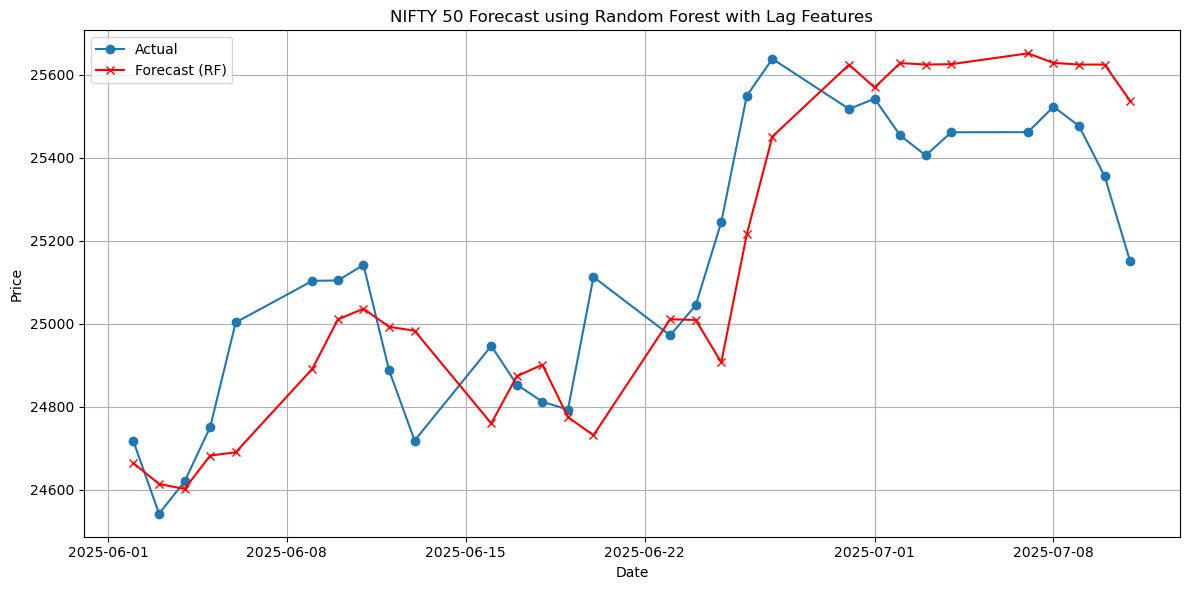

In [475]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(y_test.index, y_test, label='Actual', marker = 'o')
plt.plot(y_test.index, pred_rf, label='Forecast (RF)', color='red', marker = 'x')
plt.title("NIFTY 50 Forecast using Random Forest with Lag Features")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [476]:
nifty_rf['returns'] = nifty_rf['y'].pct_change()
nifty_rf['lag_1'] = nifty_rf['y'].shift(1)
nifty_rf['lag_2'] = nifty_rf['y'].shift(2)
nifty_rf['returns_lag1'] = nifty_rf['returns'].shift(1)
nifty_rf['returns_lag2'] = nifty_rf['returns'].shift(2)

nifty_rf['volume_lag1'] = data['Volume'].shift(1)
nifty_rf['rolling_mean_3'] = nifty_rf['y'].rolling(3).mean()
nifty_rf['rolling_std_5'] = nifty_rf['y'].rolling(5).std()


In [477]:
nifty_rf = nifty_rf.dropna()
nifty_rf

,y,lag_1,lag_2,lag_3,lag_4,lag_5,returns,returns_lag1,returns_lag2,volume_lag1,rolling_mean_3,rolling_std_5
Date,,,,,,,,,,,,
2020-07-28,11300.549805,11131.799805,11194.150391,11215.450195,11132.599609,11162.250000,0.015159,-0.005570,-0.001899,588100.0,11208.833333,69.727553
2020-07-29,11202.849609,11300.549805,11131.799805,11194.150391,11215.450195,11132.599609,-0.008646,0.015159,-0.005570,683900.0,11211.733073,60.500356
2020-07-30,11102.150391,11202.849609,11300.549805,11131.799805,11194.150391,11215.450195,-0.008989,-0.008646,0.015159,600700.0,11201.849935,76.550578
2020-07-31,11073.450195,11102.150391,11202.849609,11300.549805,11131.799805,11194.150391,-0.002585,-0.008989,-0.008646,677800.0,11126.150065,91.103933
2020-08-03,10891.599609,11073.450195,11102.150391,11202.849609,11300.549805,11131.799805,-0.016422,-0.002585,-0.008989,642600.0,11022.400065,153.249506
...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-07,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781,25517.050781,0.000012,0.002192,-0.001890,193500.0,25442.533854,49.055138
2025-07-08,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391,25541.800781,0.002404,0.000012,0.002192,196100.0,25481.600260,41.659479
2025-07-09,25476.099609,25522.500000,25461.300781,25461.000000,25405.300781,25453.400391,-0.001818,0.002404,0.000012,210400.0,25486.633464,41.901204


In [478]:
features = ['lag_1', 'lag_2','lag_3', 'returns_lag1', 'volume_lag1', 'rolling_mean_3', 'rolling_std_5']
X = nifty_rf[features]
Y = nifty_rf['y']

In [479]:
X

,lag_1,lag_2,lag_3,returns_lag1,volume_lag1,rolling_mean_3,rolling_std_5
Date,,,,,,,
2020-07-28,11131.799805,11194.150391,11215.450195,-0.005570,588100.0,11208.833333,69.727553
2020-07-29,11300.549805,11131.799805,11194.150391,0.015159,683900.0,11211.733073,60.500356
2020-07-30,11202.849609,11300.549805,11131.799805,-0.008646,600700.0,11201.849935,76.550578
2020-07-31,11102.150391,11202.849609,11300.549805,-0.008989,677800.0,11126.150065,91.103933
2020-08-03,11073.450195,11102.150391,11202.849609,-0.002585,642600.0,11022.400065,153.249506
...,...,...,...,...,...,...,...
2025-07-07,25461.000000,25405.300781,25453.400391,0.002192,193500.0,25442.533854,49.055138
2025-07-08,25461.300781,25461.000000,25405.300781,0.000012,196100.0,25481.600260,41.659479
2025-07-09,25522.500000,25461.300781,25461.000000,0.002404,210400.0,25486.633464,41.901204


In [484]:
X_train = X[:-60]
Y_train = Y[:-60]
X_test = X[-60:]
Y_test = Y[-60:]

In [485]:
rf_latest = RandomForestRegressor(n_estimators=300,random_state=42)
rf_latest.fit(X_train,Y_train)
pred_rf = rf_latest.predict(X_test)

In [486]:
rmse_rf = np.sqrt(mean_squared_error(Y_test, pred_rf))
print(f"Random Forest RMSE: {rmse_rf:.2f}")

Random Forest RMSE: 147.33


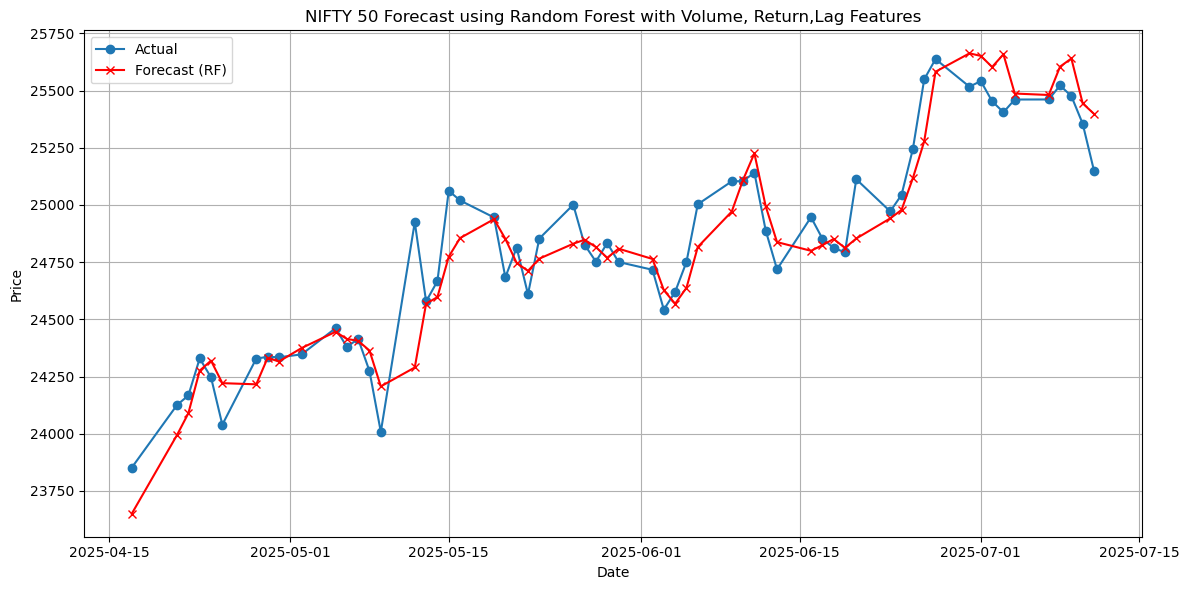

In [487]:
# Plot
plt.figure(figsize=(12,6))
plt.plot(Y_test.index, Y_test, label='Actual', marker = 'o')
plt.plot(Y_test.index, pred_rf, label='Forecast (RF)', color='red', marker = 'x')
plt.title("NIFTY 50 Forecast using Random Forest with Volume, Return,Lag Features")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()